RayOpt Tutorial
========



In [1]:
%pylab inline
import warnings
import numpy as np
import matplotlib.pyplot as plt

import rayopt as ro

# ignore matplotlib and numpy warning each other
warnings.simplefilter("ignore", FutureWarning)
# ignore floating point exceptions
np.seterr(divide="ignore", invalid="ignore")
# by default only print 4 significant digits
np.set_printoptions(precision=4)

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = ro.system_from_yaml("""
object:
  pupil:
    radius: 1
elements:
- {}
- {distance: 1, material: 1.5, roc: 5, radius: 1}
- {distance: .2, material: 1.0}
- {}
""")
s.update()
print(s)

System: 
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0
Object:
 Semi-Angle: 0 deg
 Pupil:
   Pupil Distance: 1
   Radius: 1
Image:
 Radius: inf
 Update Radius: True
 Pupil:
   Pupil Distance: -0.133333
   Update Radius: True
   Radius: 1
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        inf              None     nan     nan     nan
 1 S          1          5          2                 -   1.500   1.500     inf
 2 S        0.2        inf        inf                 -   1.000   1.000     inf
 3 S          0        inf        inf              None     nan     nan     nan



System: 
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0
Object:
 Semi-Angle: 0 deg
 Pupil:
   Pupil Distance: 1
   Radius: 1
Image:
 Radius: inf
 Update Radius: True
 Pupil:
   Pupil Distance: -0.133333
   Update Radius: True
   Radius: 1
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        inf              None     nan     nan     nan
 1 S          1          5          2                 -   1.500   1.500     inf
 2 S        0.2        inf        inf                 -   1.000   1.000     inf
 3 S     9.7839        inf        inf              None     nan     nan     nan

lagrange: -0
track length: 0.2
object, image height: [ 0.  0.]
front, back focal length (from PP): [ nan  nan]
entry, exit pupil height: [ nan  nan]
entry, exit pupil distance: [ nan  nan]
front, back focal distance: [ nan  nan]
front, back principal distance: [ nan  nan]
front, back nodal distance: [ nan  nan]
front, back numerical 

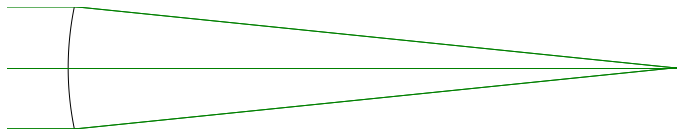

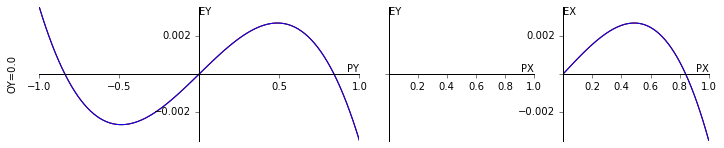

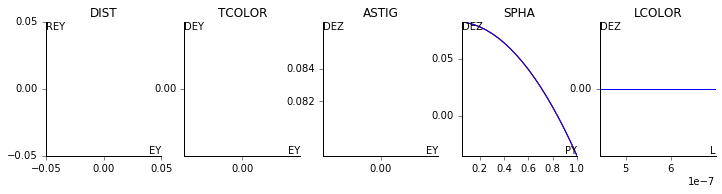

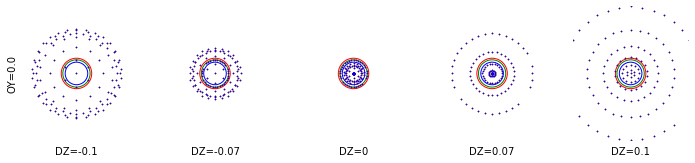

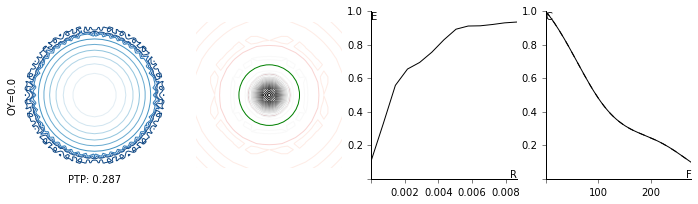

In [3]:
ro.Analysis(s)

In [4]:
lib = ro.Library.one()
for g in lib.session.query(
    ro.library.Material).filter(
    ro.library.Material.name.contains("N-BK7")):
    print(g.name, g.catalog.name, g.catalog.source)

SCHOTT-BK|N-BK7 glass rii
SCHOTT-BK|N-BK7HT glass rii
N-BK7 SCHOTT oslo
N-BK7HT SCHOTT oslo
N-BK7_MOLD RPO zemax
N-BK7 SCHOTT zemax
N-BK7HT SCHOTT zemax


System: 
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 5 deg
 Pupil:
   Pupil Distance: 1
   Radius: 1
Image:
 Radius: 0.894
 Update Radius: True
 Pupil:
   Pupil Distance: -9.67492
   Update Radius: True
   Radius: 1
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        inf              None     nan     nan     nan
 1 S          1          5          2 glass/SCHOTT-BK|N-BK7   1.517   1.517   64.17
 2 S        0.2        inf          2                 -   1.000   1.000     inf
 3 S     9.4626        inf      1.787              None     nan     nan     nan

lagrange: -0.087601
track length: 0.2
object, image height: [ 0.0876  0.8475]
front, back focal length (from PP): [-9.6749  9.6749]
entry, exit pupil height: [ 1.  1.]
entry, exit pupil distance: [-0.     -0.1319]
front, back focal distance: [-9.6749  9.5431]
front, back principal distance: [ 0.     -0.1319]
front, back 

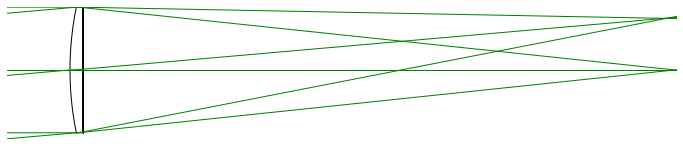

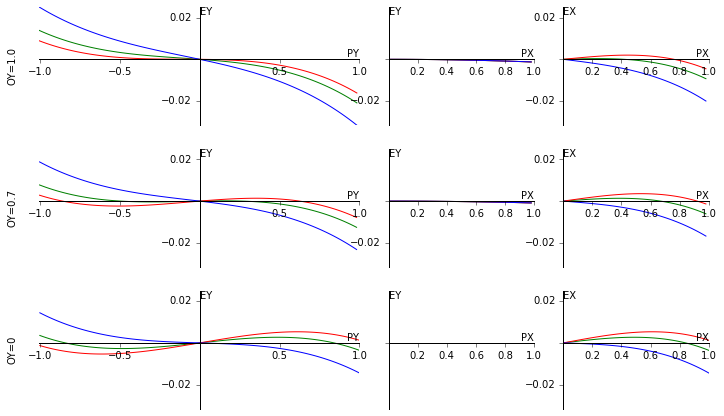

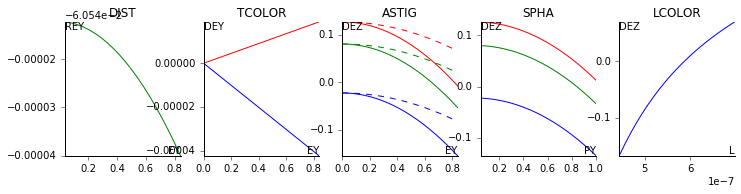

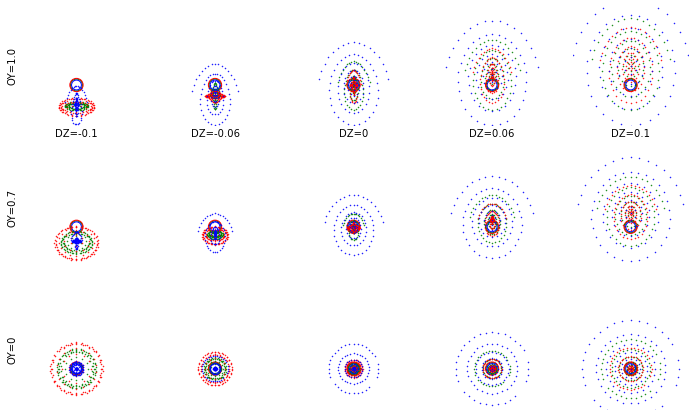

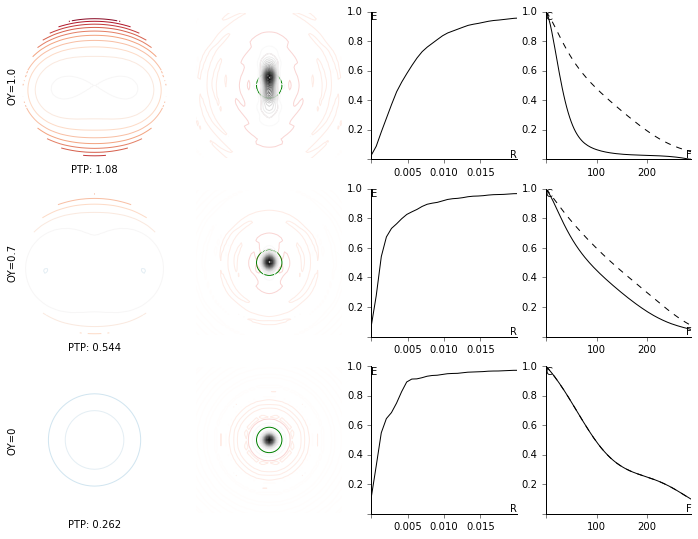

In [5]:
s[1].material = lib.get("material", "SCHOTT-BK|N-BK7", source="rii")
s.object.angle = np.deg2rad(5)
s.fields = 0, .7, 1.
s.update()
s.paraxial.resize()
s.resize_convex()
s.paraxial.refocus()
ro.Analysis(s)

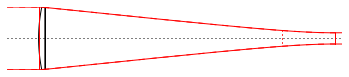

In [6]:
s.object.pupil.radius = .1
q = ro.GaussianTrace(s)
fig, ax = plt.subplots()
s.plot(ax)
q.plot(ax, color="red", scale=10)
s.object.pupil.radius = 1.

In [7]:
print(q)

 # T      path    spot a    spot b  spot ang waistx dz waisty dz   waist x   waist y
 0 S         0       0.1       0.1         0         1         1       0.1       0.1
 1 S         1       0.1       0.1         0     14.21     14.21   0.01781   0.01781
 2 S       1.2   0.09864   0.09864         0     9.236     9.236   0.01781   0.01781
 3 S     10.66   0.01796   0.01796         0   -0.2263   -0.2263   0.01781   0.01781



In [8]:
p = ro.PolyTrace(s, kmax=3)
print(p)

maximum order: 3
wavelength: 587.56

s1 : -1.15178e-02
s2 :  1.42448e-02
s3 : -4.91992e-01
s4 : -3.26901e-01
s5 :  3.72723e-02
m1 : -3.49874e-04
m2 :  1.38115e-03
m3 :  1.17243e-03
m4 : -3.74063e-02
m5 : -1.93349e-02
m6 : -3.19817e-03
m7 :  1.77746e-02
m8 : -5.97582e-02
m9 :  4.86117e-02
m10: -6.93483e-01
m11:  1.17847e-01
m12: -1.58038e-02

s1100: spherical aberration                 : -1.15178e-02
t1100: sagittal coma                        : -1.42448e-02
s2010: field curvature                      : -8.18893e-01
t2010: distortion                           : -3.72723e-02
s3001: meridional coma                      : -2.90560e-02
t3001: field curvature                      : -9.83983e-01
s4200: spherical aberration                 : -3.49874e-04
t4200: circular coma                        : -2.08715e-04
s5110: sagittal oblique spherical aberration: -1.93349e-02
t5110: meridional elliptical coma           : -7.75328e-02
s6101: circular coma                        : -2.34486e-03
t6101: 

In [9]:
s.paraxial.height[1], s.paraxial.lagrange, p.stvwof[-1, 0, 1]

(0.84752941233496903, -0.08760065866049993, -0.011517798257556017)

In [10]:
q = 1
#q *= 2
#q *= s.paraxial.height[1]
#q *= s.paraxial.lagrange
_ = p.seidel(*p.st())
print(np.array([v*q for k, v in _[:5]]))
print("\n".join(s.paraxial.print_transverse3()))

[-0.0115  0.0142 -0.492  -0.3269  0.0373]
 # T       SA3      CMA3      AST3      PTZ3      DIS3     TACHC      TCHC
 0 S         0         0         0         0         0         0         0
 1 S -0.008693 -0.003808 -0.001668  -0.00253 -0.001838  -0.01027   -0.0045
 2 S -0.002979  0.002525  -0.00214         0  0.001813 -0.005238  0.004439
 3 S        -0         0        -0         0         0         0        -0
      -0.01167 -0.001283 -0.003807  -0.00253-2.506e-05  -0.01551-6.133e-05


In [11]:
print("\n".join(p.print_trace()))

S
  n  i  j  k            1            2            3
  0  0  0  0  1.00000e+00  9.86371e-01  8.31194e-03
  1  1  0  0  0.00000e+00  6.60300e-03 -1.15178e-02
  2  0  1  0  0.00000e+00 -7.45446e-03 -8.18893e-01
  3  0  0  1  0.00000e+00 -1.18475e-03 -2.90560e-02
  4  2  0  0  0.00000e+00  1.68692e-04 -3.49874e-04
  5  1  1  0  0.00000e+00  3.50934e-03 -1.93349e-02
  6  1  0  1  0.00000e+00  1.88155e-03 -2.34486e-03
  7  0  2  0  0.00000e+00  3.16076e-03  1.17847e-01
  8  0  1  1  0.00000e+00  2.17737e-05  9.72234e-02
  9  0  0  2  0.00000e+00 -7.63784e-05 -3.19817e-03

T
  n  i  j  k            1            2            3
  0  0  0  0  0.00000e+00  1.31857e-01  9.59450e+00
  1  1  0  0  1.00000e-01  3.30150e-02 -1.42448e-02
  2  0  1  0  0.00000e+00 -3.72723e-02 -3.72723e-02
  3  0  0  1  0.00000e+00 -5.92376e-03 -9.83983e-01
  4  2  0  0  1.00000e-03  8.43458e-04 -2.08715e-04
  5  1  1  0  0.00000e+00  1.75467e-02 -7.75328e-02
  6  1  0  1  2.00000e-02  9.40777e-03 -1.80713e-02
  7  0 

In [12]:
y = np.atleast_2d([1., 0, 0])
-s[1].surface_sag(y), p.stvwof[1, -1].view(p.Simplex)(*y.T[0]**2, [0.], [0.])

(array([ 0.101]), array([ 0.101]))